source: https://www.kaggle.com/hoonkeng/deep-analysis-on-youtube-trending-videos-eda/notebook


In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
filepath1 = 'dataframe.csv' #if file is not in same dir as notebook, must change path
filepath2 = 'dataframe_all_timestamps.csv' #if file is not in same dir as notebook, must change path

df = pd.read_csv(filepath1)
df_all_timestamps = pd.read_csv(filepath2)

In [4]:
def stringify(row):
    return str(row['publish_date']) + ' ' + str(row['publish_time'])

df_all_timestamps.loc[:,'string_date_time'] = \
                            df_all_timestamps.apply(stringify, axis=1)

df_all_timestamps.loc[:,'publish_timestamp'] = \
                pd.to_datetime(df_all_timestamps['string_date_time'],
                                infer_datetime_format=True,
                                errors='coerce')

df_all_timestamps = df_all_timestamps.drop('string_date_time', axis=1)


#make a new column in df called 'publish_timestamp' 
#that is a datetime object

df.loc[:,'string_date_time'] = df.apply(stringify, axis=1)
df.loc[:,'publish_timestamp'] = \
                pd.to_datetime(df['string_date_time'],
                                infer_datetime_format=True,
                                errors='coerce')
df = df.drop('string_date_time', axis=1)

In [5]:
#optional
# makes new columns by taking the logarithm of the views, likes, 
#dislikes and comment_count to compress the scale for easier graphing 

import numpy as np
df.loc[:,'log_views'] = np.log(df.loc[:,'views']+1)
df.loc[:,'log_likes'] = np.log(df.loc[:,'likes']+1)
df.loc[:,'log_dislikes'] = np.log(df.loc[:,'dislikes']+1)
df.loc[:,'log_comment_count'] = np.log(df.loc[:,'comment_count']+1)

#show all columns
pd.set_option('display.max_columns', 100)

In [143]:
df.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,log_views,log_likes,log_dislikes,log_comment_count,tags_list
0,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR,2017-11-12 17:58:57,9.877554,7.375882,3.178054,5.375278,"[voxmakers, fermez la, alert spoiler, matthew ..."
1,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR,2017-11-12 13:46:18,9.940061,6.940222,6.326149,5.497168,"[vide grenier, vide grenier live, brocante, je..."
2,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR,2017-11-12 19:08:08,12.242660,7.255591,5.003946,4.510860,"[قناة أخبار اليوم, يومية المغرب, دولية, قضية ا..."
3,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR,2017-11-13 19:58:33,9.674074,4.962845,2.397895,2.079442,"[مسلسل عروس اسطنبول, عروس اسطنبول, عروس اسطنبو..."
4,u6EoWM2KMPE,2017-11-14,"Portokalli, 12 Nentor 2017 - Policat e postbll...",Top Channel Albania,23,Comedy,2017-11-13,13:33:26,"Portokalli""|""Comedy Show""|""Top Channel Albania...",100607,1159,48,35,https://i.ytimg.com/vi/u6EoWM2KMPE/default.jpg,False,False,False,http://top-channel.tv/programe/portokalli/,FR,2017-11-13 13:33:26,11.518987,7.056175,3.891820,3.583519,"[portokalli, comedy show, top channel albania,..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171149 entries, 0 to 171148
Data columns (total 24 columns):
video_id                  171149 non-null object
trending_date             171149 non-null object
title                     171149 non-null object
channel_title             171149 non-null object
category_id               171149 non-null int64
category                  171149 non-null object
publish_date              171149 non-null object
publish_time              171149 non-null object
tags                      171149 non-null object
views                     171149 non-null int64
likes                     171149 non-null int64
dislikes                  171149 non-null int64
comment_count             171149 non-null int64
thumbnail_link            171149 non-null object
comments_disabled         171149 non-null bool
ratings_disabled          171149 non-null bool
video_error_or_removed    171149 non-null bool
description               171149 non-null object
country           

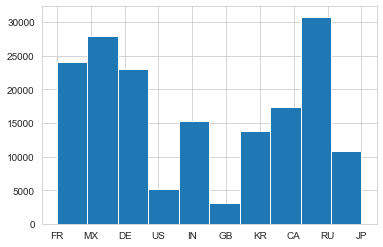

In [144]:
df['country'].hist()

# Which categories and topics create most traction in Youtube Mexico?

In [145]:
# Mexico Dataframe
mexico = df['country'] == 'MX'

df_mexico = df[mexico]
df_mexico

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,log_views,log_likes,log_dislikes,log_comment_count,tags_list
29,O9g-hqEnfUo,2017-11-14,FUERTE TEMBLOR EN IRAK HOY 12 DE NOVIEMBRE 21...,Noticias Mundiales 2017,22,People & Blogs,2017-11-12,22:23:08,FUERTE TEMBLOR EN IRAK HOY 12 DE NOVIEMBRE 210...,43849,111,49,18,https://i.ytimg.com/vi/O9g-hqEnfUo/default.jpg,False,False,False,FUERTE TEMBLOR EN IRAK HOY 12 DE NOVIEMBRE 21...,MX,2017-11-12 22:23:08,10.688530,4.718499,3.912023,2.944439,[fuerte temblor en irak hoy 12 de noviembre 21...
30,0pNCxK0Hdl8,2017-11-14,DECORACIONES PARA NAVIDAD - IDEAS PARA DECORAR...,Silvia en tu Vida,1,Film & Animation,2017-11-13,15:00:00,"DECORACIONES PARA NAVIDAD|""IDEAS PARA DECORAR ...",11553,1225,44,276,https://i.ytimg.com/vi/0pNCxK0Hdl8/default.jpg,False,False,False,Buenos días Reynas !! Hoy les traigo el\nPrime...,MX,2017-11-13 15:00:00,9.354787,7.111512,3.806662,5.624018,"[decoraciones para navidad, ideas para decorar..."
31,Dx7S34lNt6A,2017-11-14,PARA TI 🎁...con todo el amor de mi corazón Ábrelo,Frases de Amor,22,People & Blogs,2017-11-13,13:00:01,"frases de amor|""frases bonitas""|""frases de amo...",41887,1138,48,39,https://i.ytimg.com/vi/Dx7S34lNt6A/default.jpg,False,False,False,Para ti 🎁... con todo el amor de mi corazón Áb...,MX,2017-11-13 13:00:01,10.642755,7.037906,3.891820,3.688879,"[frases de amor, frases bonitas, frases de amo..."
32,QSwlPz3ruYA,2017-11-14,Caballo Sereno despide emotivamente a su dueño...,top virar,22,People & Blogs,2017-11-13,17:12:40,Caballo Sereno despide emotivamente a su dueño...,11633,191,13,5,https://i.ytimg.com/vi/QSwlPz3ruYA/default.jpg,False,False,False,"APOYAME EN PATREON, ES IMPORTANTE: https://www...",MX,2017-11-13 17:12:40,9.361687,5.257495,2.639057,1.791759,[caballo sereno despide emotivamente a su dueñ...
33,Nfd31XfFZ94,2017-11-14,"GASTE 10,000 DOLARES EN MI NUEVO MUSIC VIDEO",Aaron Echeverria,22,People & Blogs,2017-11-13,03:59:04,"hotspanish|""hotspanish vlogs""|""video oficial""|...",61222,3982,172,448,https://i.ytimg.com/vi/Nfd31XfFZ94/default.jpg,False,False,False,"GASTE 10,000 DOLARES EN MI NUEVO MUSIC VIDEO\n...",MX,2017-11-13 03:59:04,11.022278,8.289791,5.153292,6.107023,"[hotspanish, hotspanish vlogs, video oficial, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170901,ohO_3RcXc_M,2018-06-14,Boda Sin Travesti 😩🏃‍♂️👯 | Caso Cerrado | Tele...,Caso Cerrado,24,Entertainment,2018-06-12,23:00:02,"Telemundo|""doctora ana maria polo""|""batallas l...",185263,1515,219,364,https://i.ytimg.com/vi/ohO_3RcXc_M/default.jpg,False,False,False,Video oficial del controvertido programa de Te...,MX,2018-06-12 23:00:02,12.129537,7.323831,5.393628,5.899897,"[telemundo, doctora ana maria polo, batallas l..."
170902,cHlzOeiJJQQ,2018-06-14,أقوى مشاهد قيادة تحبس الأنفاس صورتها عدسات الك...,BLA BLA,27,Education,2018-05-31,10:00:09,[none],4829416,20084,4796,1221,https://i.ytimg.com/vi/cHlzOeiJJQQ/default.jpg,False,False,False,أقوى مشاهد قيادة تحبس الأنفاس صورتها عدسات الك...,MX,2018-05-31 10:00:09,15.390236,9.907729,8.475746,7.108244,[[none]]
170903,i7r_kMbyngk,2018-06-14,AMLO llegó con su esposa al Tercer Debate en M...,AMX,25,News & Politics,2018-06-13,01:15:08,"AMLO|""morena""|""política""|""PRI""|""PAN""|""PRD""|""Ló...",121674,3558,58,491,https://i.ytimg.com/vi/i7r_kMbyngk/default.jpg,False,False,False,AMLO llegó con su esposa al Tercer Debate en M...,MX,2018-06-13 01:15:08,11.709109,8.177235,4.077537,6.198479,"[amlo, morena, política, pri, pan, prd, lópez ..."
170904,_jnwjdMe3Zo,2018-06-14,Maire usa una blusa kawaiii ¿adorable o ridícula?,Historias Wink,24,Entertainment,2018-06-13,15:08:53,"maire|""maire vs el internet""|""maire vs interne...",14067,538,6,90,https://i.ytimg.com/vi/_jnwjdMe3Zo/default.jpg,False,False,

In [82]:
#tag analysis

df.loc[:,'tags_list'] = df['tags'].str.lower().str.replace(r'"','').str.split('|')
df['tags_list']

0         [voxmakers, fermez la, alert spoiler, matthew ...
1         [vide grenier, vide grenier live, brocante, je...
2         [قناة أخبار اليوم, يومية المغرب, دولية, قضية ا...
3         [مسلسل عروس اسطنبول, عروس اسطنبول, عروس اسطنبو...
4         [portokalli, comedy show, top channel albania,...
                                ...                        
171144    [elbotola.com, elbotolatv, elbotolamedia, البط...
171145    [leckerschmecker, rezepte, kochen, backen, koc...
171146    [рецепт, дачный рецепт, рецепт на углях, рецеп...
171147    [wissen2go, mrwissen2go, fußballweltmeistersch...
171148         [call of duty, cod, activision, black ops 4]
Name: tags_list, Length: 171149, dtype: object

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,log_views,log_likes,log_dislikes,log_comment_count
29,O9g-hqEnfUo,2017-11-14,FUERTE TEMBLOR EN IRAK HOY 12 DE NOVIEMBRE 21...,Noticias Mundiales 2017,22,People & Blogs,2017-11-12,22:23:08,FUERTE TEMBLOR EN IRAK HOY 12 DE NOVIEMBRE 210...,43849,111,49,18,https://i.ytimg.com/vi/O9g-hqEnfUo/default.jpg,False,False,False,FUERTE TEMBLOR EN IRAK HOY 12 DE NOVIEMBRE 21...,MX,2017-11-12 22:23:08,10.688530,4.718499,3.912023,2.944439
30,0pNCxK0Hdl8,2017-11-14,DECORACIONES PARA NAVIDAD - IDEAS PARA DECORAR...,Silvia en tu Vida,1,Film & Animation,2017-11-13,15:00:00,"DECORACIONES PARA NAVIDAD|""IDEAS PARA DECORAR ...",11553,1225,44,276,https://i.ytimg.com/vi/0pNCxK0Hdl8/default.jpg,False,False,False,Buenos días Reynas !! Hoy les traigo el\nPrime...,MX,2017-11-13 15:00:00,9.354787,7.111512,3.806662,5.624018
31,Dx7S34lNt6A,2017-11-14,PARA TI 🎁...con todo el amor de mi corazón Ábrelo,Frases de Amor,22,People & Blogs,2017-11-13,13:00:01,"frases de amor|""frases bonitas""|""frases de amo...",41887,1138,48,39,https://i.ytimg.com/vi/Dx7S34lNt6A/default.jpg,False,False,False,Para ti 🎁... con todo el amor de mi corazón Áb...,MX,2017-11-13 13:00:01,10.642755,7.037906,3.891820,3.688879
32,QSwlPz3ruYA,2017-11-14,Caballo Sereno despide emotivamente a su dueño...,top virar,22,People & Blogs,2017-11-13,17:12:40,Caballo Sereno despide emotivamente a su dueño...,11633,191,13,5,https://i.ytimg.com/vi/QSwlPz3ruYA/default.jpg,False,False,False,"APOYAME EN PATREON, ES IMPORTANTE: https://www...",MX,2017-11-13 17:12:40,9.361687,5.257495,2.639057,1.791759
33,Nfd31XfFZ94,2017-11-14,"GASTE 10,000 DOLARES EN MI NUEVO MUSIC VIDEO",Aaron Echeverria,22,People & Blogs,2017-11-13,03:59:04,"hotspanish|""hotspanish vlogs""|""video oficial""|...",61222,3982,172,448,https://i.ytimg.com/vi/Nfd31XfFZ94/default.jpg,False,False,False,"GASTE 10,000 DOLARES EN MI NUEVO MUSIC VIDEO\n...",MX,2017-11-13 03:59:04,11.022278,8.289791,5.153292,6.107023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170901,ohO_3RcXc_M,2018-06-14,Boda Sin Travesti 😩🏃‍♂️👯 | Caso Cerrado | Tele...,Caso Cerrado,24,Entertainment,2018-06-12,23:00:02,"Telemundo|""doctora ana maria polo""|""batallas l...",185263,1515,219,364,https://i.ytimg.com/vi/ohO_3RcXc_M/default.jpg,False,False,False,Video oficial del controvertido programa de Te...,MX,2018-06-12 23:00:02,12.129537,7.323831,5.393628,5.899897
170902,cHlzOeiJJQQ,2018-06-14,أقوى مشاهد قيادة تحبس الأنفاس صورتها عدسات الك...,BLA BLA,27,Education,2018-05-31,10:00:09,[none],4829416,20084,4796,1221,https://i.ytimg.com/vi/cHlzOeiJJQQ/default.jpg,False,False,False,أقوى مشاهد قيادة تحبس الأنفاس صورتها عدسات الك...,MX,2018-05-31 10:00:09,15.390236,9.907729,8.475746,7.108244
170903,i7r_kMbyngk,2018-06-14,AMLO llegó con su esposa al Tercer Debate en M...,AMX,25,News & Politics,2018-06-13,01:15:08,"AMLO|""morena""|""política""|""PRI""|""PAN""|""PRD""|""Ló...",121674,3558,58,491,https://i.ytimg.com/vi/i7r_kMbyngk/default.jpg,False,False,False,AMLO llegó con su esposa al Tercer Debate en M...,MX,2018-06-13 01:15:08,11.709109,8.177235,4.077537,6.198479
170904,_jnwjdMe3Zo,2018-06-14,Maire usa una blusa kawaiii ¿adorable o ridícula?,Historias Wink,24,Entertainment,2018-06-13,15:08:53,"maire|""maire vs el internet""|""maire vs interne...",14067,538,6,90,https://i.ytimg.com/vi/_jnwjdMe3Zo/default.jpg,False,False,False,Maire usa una blusa kawaii de Alicia en el paí...,MX,2018-06-13 15:08:53,9.551658,6.289716,1.945910,4.510860


In [32]:
df_mexico.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27900 entries, 29 to 170906
Data columns (total 25 columns):
video_id                  27900 non-null object
trending_date             27900 non-null object
title                     27900 non-null object
channel_title             27900 non-null object
category_id               27900 non-null int64
category                  27900 non-null object
publish_date              27900 non-null object
publish_time              27900 non-null object
tags                      27900 non-null object
views                     27900 non-null int64
likes                     27900 non-null int64
dislikes                  27900 non-null int64
comment_count             27900 non-null int64
thumbnail_link            27900 non-null object
comments_disabled         27900 non-null bool
ratings_disabled          27900 non-null bool
video_error_or_removed    27900 non-null bool
description               27900 non-null object
country                   27900 non-

In [141]:
react_subset = df_mexico[['category','likes','comment_count']]

In [25]:
df_mexico.loc[:,'tags_list'] = df['tags'].str.lower().str.replace(r'"','').str.split('|')
df['tags_list']

0         [voxmakers, fermez la, alert spoiler, matthew ...
1         [vide grenier, vide grenier live, brocante, je...
2         [قناة أخبار اليوم, يومية المغرب, دولية, قضية ا...
3         [مسلسل عروس اسطنبول, عروس اسطنبول, عروس اسطنبو...
4         [portokalli, comedy show, top channel albania,...
                                ...                        
171144    [elbotola.com, elbotolatv, elbotolamedia, البط...
171145    [leckerschmecker, rezepte, kochen, backen, koc...
171146    [рецепт, дачный рецепт, рецепт на углях, рецеп...
171147    [wissen2go, mrwissen2go, fußballweltmeistersch...
171148         [call of duty, cod, activision, black ops 4]
Name: tags_list, Length: 171149, dtype: object

In [ ]:
react_subset = df_mexico[['category','likes','comment_count']]

In [142]:
view_subset = df_mexico[['category','views']]

In [190]:
view_subset.max()

category    Travel & Events
views              23291675
dtype: object

In [177]:
react_subset.max()

category         People & Blogs
likes                      3982
comment_count               448
dtype: object

In [206]:
view_subset.head().max()

category    People & Blogs
views                61222
dtype: object

In [201]:
df_mexico.groupby('category')['likes'].max().sort_values(ascending=False)

category
Entertainment            1348973
Music                     975306
People & Blogs            708484
Comedy                    650194
Howto & Style             315370
Sports                    291773
Gaming                    181285
Film & Animation          139810
Autos & Vehicles          126991
Travel & Events            97714
News & Politics            78295
Science & Technology       62313
Pets & Animals             43791
Education                  30399
Nonprofits & Activism       5479
Shows                        369
Name: likes, dtype: int64

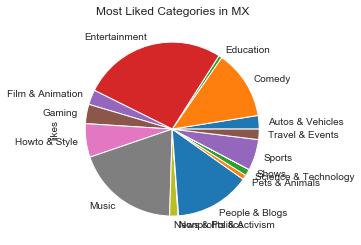

In [202]:
df_mexico.groupby('category')['likes'].agg('max').plot(kind='pie',title='Most Liked Categories in MX')

In [200]:
df_mexico.groupby('category')['comment_count'].max().sort_values(ascending=False)

category
Comedy                   337345
Entertainment            209209
People & Blogs           136436
Music                    122030
Howto & Style            102585
Gaming                    44817
Sports                    34192
Autos & Vehicles          28923
News & Politics           23207
Film & Animation          15237
Science & Technology      12597
Travel & Events           11449
Education                  9124
Pets & Animals             5878
Nonprofits & Activism      1806
Shows                       242
Name: comment_count, dtype: int64

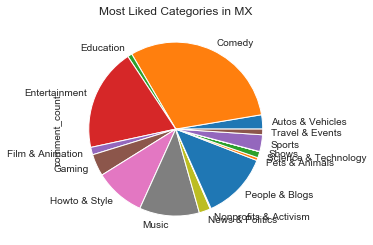

In [204]:
df_mexico.groupby('category')['comment_count'].agg('max').plot(kind='pie',title='Most Liked Categories in MX')

In [199]:
df_mexico.groupby('category')['views'].max().sort_values(ascending=False)

category
Music                    23291675
News & Politics          21716633
Entertainment             9709778
People & Blogs            8940772
Comedy                    7678558
Film & Animation          5434010
Education                 4829416
Pets & Animals            3886909
Sports                    3306032
Gaming                    2712862
Howto & Style             2229446
Autos & Vehicles          2042879
Science & Technology      1797494
Travel & Events           1615589
Nonprofits & Activism      925352
Shows                       57679
Name: views, dtype: int64

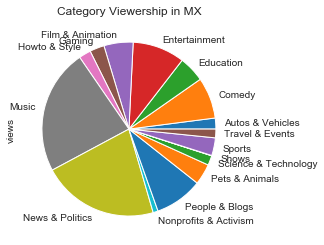

In [198]:
df_mexico.groupby('category')['views'].agg('max').plot(kind='pie',title='Category Viewership in MX')

In [158]:
df_mexico_minmax = df_mexico.groupby('category')[['views','likes','dislikes']].aggregate(['max','min'])
max_views = df_mexico_minmax['views']['max']
df_mexico[df_mexico['views'].isin(max_views)].sort_values(by='views', ascending=False)

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,log_views,log_likes,log_dislikes,log_comment_count,tags_list
145349,8-mloCL49vs,2018-05-13,Karol G - Mi Cama,KarolGVEVO,10,Music,2018-05-11,04:00:00,"Karol|""Mi""|""Cama""|""Universal""|""Music""|""Latino""...",23291675,281529,16377,14820,https://i.ytimg.com/vi/8-mloCL49vs/default.jpg,False,False,False,Music video by Karol G performing Mi Cama. © 2...,MX,2018-05-11 04:00:00,16.963607,12.547994,9.703694,9.603800,"[karol, mi, cama, universal, music, latino, la..."
167114,wzbik17wFVw,2018-06-10,Aquí mi respuesta a los nuevos ataques del gob...,RICARDO ANAYA,25,News & Politics,2018-06-08,03:06:01,"ricardo anaya cortés|""coalición por méxico al ...",21716633,0,0,0,https://i.ytimg.com/vi/wzbik17wFVw/default.jpg,True,True,False,Les pido me ayuden a difundirla.,MX,2018-06-08 03:06:01,16.893589,0.000000,0.000000,0.000000,"[ricardo anaya cortés, coalición por méxico al..."
37839,q_j0vVn9v0g,2017-12-31,ROAST YOURSELF CHALLENGE - LA DIVAZA,LA DIVAZA,24,Entertainment,2017-12-29,01:00:06,"ROAST|""ROAST YOURSELF CHALLENGE""|""roast yourse...",9709778,1348973,26707,209209,https://i.ytimg.com/vi/q_j0vVn9v0g/default.jpg,False,False,False,La unica diva soy yo.\nUN MILLÓN DE LIKES!!!! ...,MX,2017-12-29 01:00:06,16.088644,14.114855,10.192718,12.251094,"[roast, roast yourself challenge, roast yourse..."
130333,ummI3h6Lbm0,2018-04-26,Crema y Quesos LALA®,LALA México,22,People & Blogs,2018-04-09,22:03:12,"recetas|""comida""|""crema""",8940772,131,229,47,https://i.ytimg.com/vi/ummI3h6Lbm0/default.jpg,False,False,False,"¡Adivinaste, tus sospechas eran ciertas! Jaque...",MX,2018-04-09 22:03:12,16.006133,4.882802,5.438079,3.871201,"[recetas, comida, crema]"
42531,PALcJ0HW1-I,2018-01-05,WALK IN THE WOODS WITH A LOGAN PAUL MEME,PewDiePie,23,Comedy,2018-01-02,17:12:39,[none],7678558,433759,28404,43147,https://i.ytimg.com/vi/PALcJ0HW1-I/default.jpg,False,False,False,Full song: https://www.youtube.com/watch?v=n38...,MX,2018-01-02 17:12:39,15.853942,12.980247,10.254320,10.672391,[[none]]
164784,HtmVePtxh-Q,2018-06-07,Ralph el Demoledor 2: Wifi Ralph Disney Traile...,TrailersTC,1,Film & Animation,2018-06-04,20:42:19,"Ralph el Demoledor 2|""Wreck-It Ralph 2""|""Wifi ...",5434010,139810,3397,12406,https://i.ytimg.com/vi/HtmVePtxh-Q/default.jpg,False,False,False,Ralph el Demoledor 2: Wifi Ralph Disney Traile...,MX,2018-06-04 20:42:19,15.508188,11.848047,8.130942,9.426016,"[ralph el demoledor 2, wreck-it ralph 2, wifi ..."
170902,cHlzOeiJJQQ,2018-06-14,أقوى مشاهد قيادة تحبس الأنفاس صورتها عدسات الك...,BLA BLA,27,Education,2018-05-31,10:00:09,[none],4829416,20084,4796,1221,https://i.ytimg.com/vi/cHlzOeiJJQQ/default.jpg,False,False,False,أقوى مشاهد قيادة تحبس الأنفاس صورتها عدسات الك...,MX,2018-05-31 10:00:09,15.390236,9.907729,8.475746,7.108244,[[none]]
147246,UOwU1Gcp42I,2018-05-15,Jack Russell Terrier Meeting German Shepherd F...,Alyza Vlogs,15,Pets & Animals,2018-05-13,16:25:18,"Jack Russell Terrier|""Meeting""|""German Shepher...",3886909,5698,2812,181,https://i.ytimg.com/vi/UOwU1Gcp42I/default.jpg,False,False,False,In this video show about village dogs meeting ...,MX,2018-05-13 16:25:18,15.173125,8.648046,7.942007,5.204007,"[jack russell terrier, meeting, german shepher..."
62887,t6jLE2PIOYU,2018-02-01,"Royal Rumble Kickoff: Jan. 28, 2018",WWE,17,Sports,2018-01-29,00:15:24,"wrestling|""submission wrestling""|""wwe""|""profes...",3306032,52279,2917,1682,https://i.ytimg.com/vi/t6jLE2PIOYU/default.jpg,False,False,False,"Catch all the late-breaking news, expert analy...",MX,2018-01-29 00:15:24,15.011260,10.864369,7.978654,7.428333,"[wrestling, submission wrestling, wwe, profess..."
97653,ggtJKDJdBSo,2018-03-14,VICTORIA TRAS VICTORIA - Directo LEGENDARIO - ...,elrubiusOMG,20,Gaming,2018-03-12,04:14:49,[none],2712862,172796,3934,

In [167]:
df_mexico_minmax = df_mexico.groupby('category')[['views','likes','dislikes']].aggregate(['max','min'])
max_views = df_mexico_minmax['likes']['max']
df_mexico[df_mexico['likes'].isin(max_views)].sort_values(by='likes', ascending=False)

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,log_views,log_likes,log_dislikes,log_comment_count,tags_list
37839,q_j0vVn9v0g,2017-12-31,ROAST YOURSELF CHALLENGE - LA DIVAZA,LA DIVAZA,24,Entertainment,2017-12-29,01:00:06,"ROAST|""ROAST YOURSELF CHALLENGE""|""roast yourse...",9709778,1348973,26707,209209,https://i.ytimg.com/vi/q_j0vVn9v0g/default.jpg,False,False,False,La unica diva soy yo.\nUN MILLÓN DE LIKES!!!! ...,MX,2017-12-29 01:00:06,16.088644,14.114855,10.192718,12.251094,"[roast, roast yourself challenge, roast yourse..."
89292,qS6F64mj6LY,2018-03-04,Bad Bunny - Si Te Acuerdas | Video Oficial,Bad Bunny,10,Music,2018-03-01,17:00:04,"Bad|""Bunny""|""Bad Bunny""|""Dime Si Te Acuerdas""|...",18161484,975306,39757,53373,https://i.ytimg.com/vi/qS6F64mj6LY/default.jpg,False,False,False,-Click para suscribirte: http://bit.ly/badbunn...,MX,2018-03-01 17:00:04,16.714814,13.790508,10.590566,10.885079,"[bad, bunny, bad bunny, dime si te acuerdas, v..."
78842,osgnc2jNvL8,2018-02-20,BAILANDO SCOOBY DOO PA PA EN LA CALLE / JUKILOP,JukiLop,22,People & Blogs,2018-02-18,19:59:24,"jukilop|""linduras""|""pantojitas""|""kimberly""|""lo...",4476098,708484,12242,39157,https://i.ytimg.com/vi/osgnc2jNvL8/default.jpg,False,False,False,Hola familia JUKILOP ❤️ estamos muy contentos ...,MX,2018-02-18 19:59:24,15.314262,13.470884,9.412710,10.575360,"[jukilop, linduras, pantojitas, kimberly, loai..."
150948,3Je237UiSg0,2018-05-20,► ROAST YOURSELF CHALLENGE | Rayito,DebRyanShow,23,Comedy,2018-05-16,19:00:00,"2018|""De""|""DebRyanShow""|""DebRyan""|""deb""|""DebRy...",5987568,650194,27763,43381,https://i.ytimg.com/vi/3Je237UiSg0/default.jpg,False,False,False,¡Que onda Fritos! ¿Como están?→ Me Dicen Rayit...,MX,2018-05-16 19:00:00,15.605196,13.385028,10.231495,10.677800,"[2018, de, debryanshow, debryan, deb, debryan ..."
152473,we_oDwNJfEc,2018-05-22,Tu Mejor Versión (VIDEO OFICIAL) l Pautips,Pautips,26,Howto & Style,2018-05-20,21:00:05,"pautips|""pau tips""|""pautips youtube""|""pautips ...",1861341,315370,7237,23339,https://i.ytimg.com/vi/we_oDwNJfEc/default.jpg,False,False,False,Tu Mejor Versión (VIDEO OFICIAL) l Pautips Des...,MX,2018-05-20 21:00:05,14.436808,12.661505,8.887100,10.057924,"[pautips, pau tips, pautips youtube, pautips y..."
14477,ubyXi8c097Q,2017-12-01,MI VIAJE CON LOS JUGADORES DEL REAL MADRID,DjMaRiiO,17,Sports,2017-11-29,22:04:11,"fifa 18|""fifa18""|""fut 18""|""ultimate""|""team""|""d...",1295546,291773,1627,6154,https://i.ytimg.com/vi/ubyXi8c097Q/default.jpg,False,False,False,► SUSCRÍBETE AQUÍ: http://goo.gl/Fd9Cwb\n➜ Síg...,MX,2017-11-29 22:04:11,14.074444,12.583735,7.395108,8.725020,"[fifa 18, fifa18, fut 18, ultimate, team, djma..."
22452,zf4uXHdt_R4,2017-12-11,🔴 MI GATITA KIRA 😍,VEGETTA777,20,Gaming,2017-12-09,18:44:15,"kira|""PLAYERUNKNOWN'S BATTLEGROUNDS""|""directo""...",1226875,181285,2874,4348,https://i.ytimg.com/vi/zf4uXHdt_R4/default.jpg,False,False,False,* Hoy probaremos el nuevo mapa de PLAYERUNKNOW...,MX,2017-12-09 18:44:15,14.019982,12.107831,7.963808,8.377701,"[kira, playerunknown's battlegrounds, directo,..."
164784,HtmVePtxh-Q,2018-06-07,Ralph el Demoledor 2: Wifi Ralph Disney Traile...,TrailersTC,1,Film & Animation,2018-06-04,20:42:19,"Ralph el Demoledor 2|""Wreck-It Ralph 2""|""Wifi ...",5434010,139810,3397,12406,https://i.ytimg.com/vi/HtmVePtxh-Q/default.jpg,False,False,False,Ralph el Demoledor 2: Wifi Ralph Disney Traile...,MX,2018-06-04 20:42:19,15.508188,11.848047,8.130942,9.426016,"[ralph el demoledor 2, wreck-it ralph 2, wifi ..."
112109,A_KOtwWQfwQ,2018-03-31,NUEVOS FRENOS AL BVOCHIDISIMO!! | JUCA,JUCA,2,Autos & Vehicles,2018-03-28,22:30:00,"tuning|""modificaciones""|""juca""|""jucaviapri""|""e...",2042879,126991,2349,9408,https://i.ytimg.com/vi/A_KOtwWQfwQ/default.jpg,False,False,False,"Muchas gracias por ver e

# KEYWORDS / tags

In [163]:
def amigos(row):
    if 'amigos' in row:
        return True
    else:
        return False
    
amigos_df = df_mexico[df_mexico['tags_list'].apply(amigos)]
amigos_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 2364 to 170085
Data columns (total 25 columns):
video_id                  85 non-null object
trending_date             85 non-null object
title                     85 non-null object
channel_title             85 non-null object
category_id               85 non-null int64
category                  85 non-null object
publish_date              85 non-null object
publish_time              85 non-null object
tags                      85 non-null object
views                     85 non-null int64
likes                     85 non-null int64
dislikes                  85 non-null int64
comment_count             85 non-null int64
thumbnail_link            85 non-null object
comments_disabled         85 non-null bool
ratings_disabled          85 non-null bool
video_error_or_removed    85 non-null bool
description               85 non-null object
country                   85 non-null object
publish_timestamp         85 non-null datetime

In [ ]:
amigos_df.groupby('views').plot()

In [31]:
def amlo(row):
    if 'amlo' in row:
        return True
    else:
        return False
    
amlo_df = df_mexico[df_mexico['tags_list'].apply(amlo)]
amlo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 787 entries, 142 to 170903
Data columns (total 25 columns):
video_id                  787 non-null object
trending_date             787 non-null object
title                     787 non-null object
channel_title             787 non-null object
category_id               787 non-null int64
category                  787 non-null object
publish_date              787 non-null object
publish_time              787 non-null object
tags                      787 non-null object
views                     787 non-null int64
likes                     787 non-null int64
dislikes                  787 non-null int64
comment_count             787 non-null int64
thumbnail_link            787 non-null object
comments_disabled         787 non-null bool
ratings_disabled          787 non-null bool
video_error_or_removed    787 non-null bool
description               787 non-null object
country                   787 non-null object
publish_timestamp         7

In [79]:
def challenge(row):
    if 'challenge' in row:
        return True
    else:
        return False
    
challenge_df = df_mexico[df_mexico['tags_list'].apply(challenge)]
challenge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 184 to 169238
Data columns (total 25 columns):
video_id                  248 non-null object
trending_date             248 non-null object
title                     248 non-null object
channel_title             248 non-null object
category_id               248 non-null int64
category                  248 non-null object
publish_date              248 non-null object
publish_time              248 non-null object
tags                      248 non-null object
views                     248 non-null int64
likes                     248 non-null int64
dislikes                  248 non-null int64
comment_count             248 non-null int64
thumbnail_link            248 non-null object
comments_disabled         248 non-null bool
ratings_disabled          248 non-null bool
video_error_or_removed    248 non-null bool
description               248 non-null object
country                   248 non-null object
publish_timestamp         2

In [85]:
def latino(row):
    if 'latino' in row:
        return True
    else:
        return False
    
latino_df = df_mexico[df_mexico['tags_list'].apply(latino)]
latino_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 2253 to 169218
Data columns (total 25 columns):
video_id                  217 non-null object
trending_date             217 non-null object
title                     217 non-null object
channel_title             217 non-null object
category_id               217 non-null int64
category                  217 non-null object
publish_date              217 non-null object
publish_time              217 non-null object
tags                      217 non-null object
views                     217 non-null int64
likes                     217 non-null int64
dislikes                  217 non-null int64
comment_count             217 non-null int64
thumbnail_link            217 non-null object
comments_disabled         217 non-null bool
ratings_disabled          217 non-null bool
video_error_or_removed    217 non-null bool
description               217 non-null object
country                   217 non-null object
publish_timestamp         

In [61]:
def gobierno(row):
    if 'gobierno' in row:
        return True
    else:
        return False
    
gobierno_df = df_mexico[df_mexico['tags_list'].apply(gobierno)]
gobierno_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 2358 to 165391
Data columns (total 25 columns):
video_id                  21 non-null object
trending_date             21 non-null object
title                     21 non-null object
channel_title             21 non-null object
category_id               21 non-null int64
category                  21 non-null object
publish_date              21 non-null object
publish_time              21 non-null object
tags                      21 non-null object
views                     21 non-null int64
likes                     21 non-null int64
dislikes                  21 non-null int64
comment_count             21 non-null int64
thumbnail_link            21 non-null object
comments_disabled         21 non-null bool
ratings_disabled          21 non-null bool
video_error_or_removed    21 non-null bool
description               21 non-null object
country                   21 non-null object
publish_timestamp         21 non-null datetime

TypeError: list indices must be integers or slices, not str

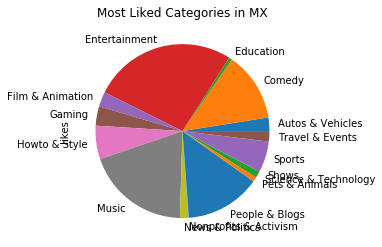

In [13]:
df_mexico.groupby('category')['likes'].agg('max').plot(kind='pie',title='Most Liked Categories in MX')

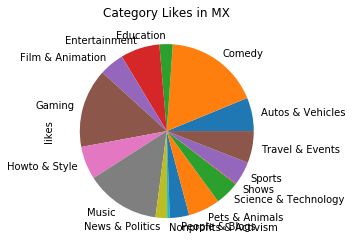

In [28]:
df_mexico.groupby('category')['likes'].agg('mean').plot(kind='pie',title='Category Likes in MX')

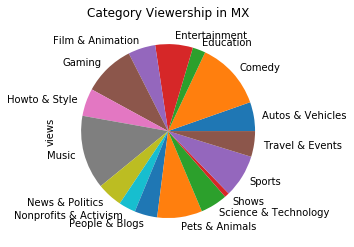

In [19]:
df_mexico.groupby('category')['views'].agg('mean').plot(kind='pie',title='Category Viewership in MX')

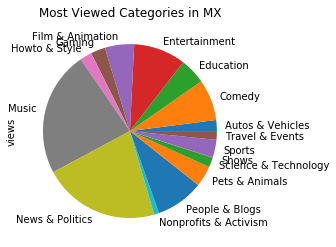

In [20]:
df_mexico.groupby('category')['views'].agg('max').plot(kind='pie',title='Most Viewed Categories in MX')

Text(0, 0.5, 'Likes')

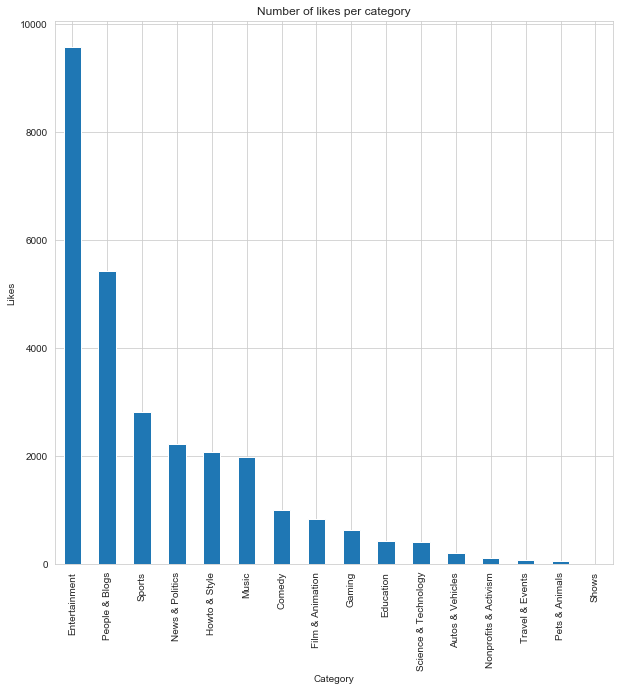

In [129]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('Number of likes per category') # Give the plot a main title
ax.set_xlabel('Category') # Set text for the x axis
ax.set_ylabel('Likes')# Set text for y axis

In [134]:
counts = df_mexico['tags_list'].value_counts() # find the counts for each unique category
counts

[[none]]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                4052
[4k, el salvador, el salvador 4k, videos, paisajes, naturaleza, don barrabas, gladis, la sirenita, emely, mr bone, nano, maruca, don hueso, norma, normita, don pop, armando, cipitio, don pollo, max, pablito, messi, heidi, candy, lidiona, micky, wendy, nallely, nayeli, travel, world, spanish, gringos, culture, news, salvador, san salvador, life style, campo, vida real, volcanes, rios, lagos, recetas, comida, paz, armonia, compañeros, claudia, mikko, gustavo, tia janeth, pedro, foncho]   

In [ ]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
auto_prices[['engine-size','fuel-type']].boxplot(by = 'fuel-type', ax = ax) # Use the plot.bar method on the new data frame
ax.set_title('Box plots of auto engine size by fule type') # Give the plot a main title
ax.set_xlabel('Fuel type') # Set text for the x axis
ax.set_ylabel('Engine size')# Set text for y axis

In [41]:
df_mexico[df_mexico['views']==23291675]

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,log_views,log_likes,log_dislikes,log_comment_count,tags_list
145349,8-mloCL49vs,2018-05-13,Karol G - Mi Cama,KarolGVEVO,10,Music,2018-05-11,04:00:00,"Karol|""Mi""|""Cama""|""Universal""|""Music""|""Latino""...",23291675,281529,16377,14820,https://i.ytimg.com/vi/8-mloCL49vs/default.jpg,False,False,False,Music video by Karol G performing Mi Cama. © 2...,MX,2018-05-11 04:00:00,16.963607,12.547994,9.703694,9.6038,"[karol, mi, cama, universal, music, latino, la..."


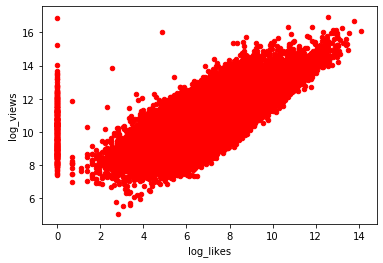

In [87]:
df_mexico.plot(x='log_likes',y='log_views',kind='scatter',color='R')

# GRAPHS FOR DATA SET OVERVIEW

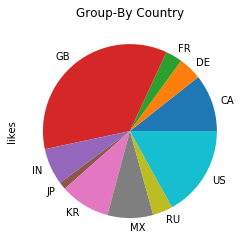

In [98]:
df.groupby('country')['likes'].agg('max').plot(kind='pie',title='Likes Group-By Country')


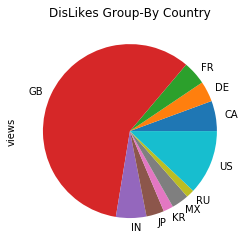

In [100]:
df.groupby('country')['views'].agg('max').plot(kind='pie',title='DisLikes Group-By Country')

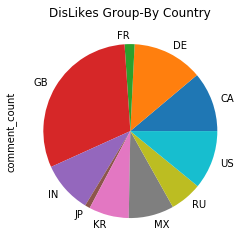

In [101]:
df.groupby('country')['comment_count'].agg('max').plot(kind='pie',title='DisLikes Group-By Country')

Text(0.5, 1.0, '')

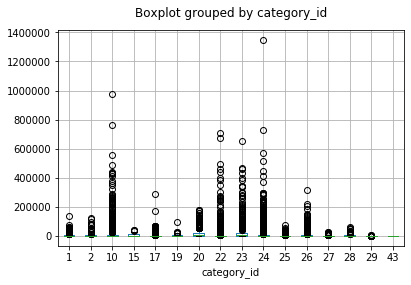

In [109]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
df_mexico[['engine-size','fuel-type']].boxplot(by = 'fuel-type', ax = ax) # Use the plot.bar method on the new data frame
ax.set_title('Box plots of auto engine size by fule type') # Give the plot a main title
ax.set_xlabel('Fuel type') # Set text for the x axis
ax.set_ylabel('Engine size')# Set text for y axis

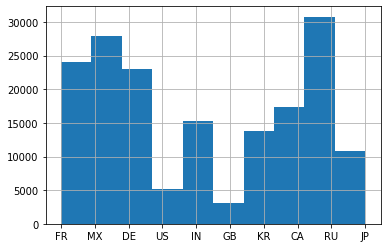

In [94]:
df['country'].hist()

# Opening
-Determine what this graph depicts and what it shows (ask A or S
-Russia being the lead, turned to MX who appears to be following.
-Mexico represents Latino culture and as you guys know I am latino so I thought I could somehow relate to this dataframe


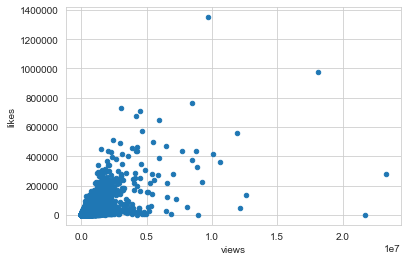

In [123]:
df_mexico.plot.scatter('views', 'likes')

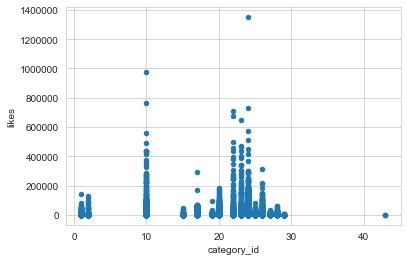

In [124]:
df_mexico.plot.scatter('category_id', 'likes')

In [120]:
df[['category','category_id']].groupby('category_id').agg('min')

,category
category_id,
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports
19,Travel & Events
20,Gaming
22,People & Blogs
23,Comedy


In [119]:
counts = df_mexico['category'].value_counts()
counts

Entertainment            9575
People & Blogs           5416
Sports                   2820
News & Politics          2225
Howto & Style            2084
Music                    1977
Comedy                   1010
Film & Animation          847
Gaming                    640
Education                 426
Science & Technology      405
Autos & Vehicles          212
Nonprofits & Activism     116
Travel & Events            78
Pets & Animals             66
Shows                       3
Name: category, dtype: int64